In [2]:

import pandas as pd
import requests
from io import BytesIO

base_url = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/"
creation = "20250520"

#function for downloading files
def download_csv_gz(file_name):
    url = base_url + file_name
    print(f"Downloading {url}")
    r = requests.get(url)
    r.raise_for_status()
    return pd.read_csv(BytesIO(r.content), compression='gzip', low_memory=False)

data_low = {}
data_high = {}

group1 = ['F0', 'F1', 'F2']
group2 = ['F3', 'F4', 'F5']

for i in range(1951,1981):
    year = i
    details_file = f"StormEvents_details-ftp_v1.0_d{year}_c{creation}.csv.gz"
    df_details = download_csv_gz(details_file)

    df_details.columns = df_details.columns.str.lower()

    assert 'event_id' in df_details.columns, "event_id missing from details"


    df_clean = df_details[['state','year', 'begin_lat','begin_lon','tor_f_scale']]

    #df_clean.to_csv("{year}file.csv", index=False)
    #print(tornado_summary.head())
    exclude_states =  ['ALASKA', 'HAWAII', 'PUERTO RICO', 'GUAM', 'AMERICAN SAMOA', 'COMMONWEALTH OF THE NORTHERN MARIANA ISLANDS', 'UNITED STATES MINOR OUTLYING ISLANDS']

    state_filtered_df = df_clean[~df_clean['state'].isin(exclude_states)]
    state_filtered_df_clean = state_filtered_df.dropna()

    #state_filtered_df_clean.to_csv(f"{year}_summary.csv", index=False)
    df = state_filtered_df_clean
    # Split the DataFrame
    df1 = df[df['tor_f_scale'].isin(group1)].copy()
    df2 = df[df['tor_f_scale'].isin(group2)].copy()

    data_low[i] = df1
    data_high[i] = df2



    

In [8]:
data_low[1970]

,state,year,begin_lat,begin_lon,tor_f_scale
1,MISSOURI,1970,40.42,-92.57,F1
26,TEXAS,1970,32.37,-99.00,F1
54,OKLAHOMA,1970,34.47,-99.75,F0
55,OKLAHOMA,1970,34.45,-99.77,F0
56,OKLAHOMA,1970,34.43,-99.70,F0
...,...,...,...,...,...
3187,WISCONSIN,1970,44.53,-89.22,F2
3189,WISCONSIN,1970,43.23,-88.57,F1
3198,IOWA,1970,40.58,-93.52,F2
3205,IOWA,1970,41.30,-91.53,F2


In [9]:
data_high[1957]

,state,year,begin_lat,begin_lon,tor_f_scale
3,NORTH CAROLINA,1957,35.73,-77.67,F3
21,ALABAMA,1957,34.12,-87.98,F3
22,ALABAMA,1957,34.32,-86.98,F3
23,ALABAMA,1957,34.45,-86.42,F3
24,ALABAMA,1957,34.30,-86.60,F3
...,...,...,...,...,...
2144,TENNESSEE,1957,35.05,-88.60,F3
2150,ILLINOIS,1957,38.08,-89.25,F5
2151,ILLINOIS,1957,37.70,-89.48,F4
2180,ILLINOIS,1957,37.57,-89.32,F3


In [2]:
data[1970]

,state,year,begin_lat,begin_lon,tor_f_scale
1,MISSOURI,1970,40.42,-92.57,F1
10,KANSAS,1970,39.57,-100.45,F3
26,TEXAS,1970,32.37,-99.00,F1
54,OKLAHOMA,1970,34.47,-99.75,F0
55,OKLAHOMA,1970,34.45,-99.77,F0
...,...,...,...,...,...
3187,WISCONSIN,1970,44.53,-89.22,F2
3189,WISCONSIN,1970,43.23,-88.57,F1
3198,IOWA,1970,40.58,-93.52,F2
3205,IOWA,1970,41.30,-91.53,F2


In [4]:
df = data[1970]
# Define category groups
group1 = ['F0', 'F1', 'F2']
group2 = ['F3', 'F4', 'F5']

# Split the DataFrame
df1 = df[df['tor_f_scale'].isin(group1)].copy()
df2 = df[df['tor_f_scale'].isin(group2)].copy()


In [5]:
df1

,state,year,begin_lat,begin_lon,tor_f_scale
1,MISSOURI,1970,40.42,-92.57,F1
26,TEXAS,1970,32.37,-99.00,F1
54,OKLAHOMA,1970,34.47,-99.75,F0
55,OKLAHOMA,1970,34.45,-99.77,F0
56,OKLAHOMA,1970,34.43,-99.70,F0
...,...,...,...,...,...
3187,WISCONSIN,1970,44.53,-89.22,F2
3189,WISCONSIN,1970,43.23,-88.57,F1
3198,IOWA,1970,40.58,-93.52,F2
3205,IOWA,1970,41.30,-91.53,F2


In [6]:
df2

,state,year,begin_lat,begin_lon,tor_f_scale
10,KANSAS,1970,39.57,-100.45,F3
219,OKLAHOMA,1970,36.25,-98.15,F3
225,MISSOURI,1970,36.70,-91.40,F3
280,MISSISSIPPI,1970,34.72,-89.00,F4
282,MISSISSIPPI,1970,34.82,-88.75,F4
...,...,...,...,...,...
3090,TEXAS,1970,35.03,-100.97,F4
3091,TEXAS,1970,35.18,-100.73,F4
3140,TEXAS,1970,35.37,-101.08,F4
3152,LOUISIANA,1970,32.37,-93.62,F3


In [3]:
import pandas as pd
import numpy as np

datan = {}

for i in range(1951,1981):
    datanow = data_low[i]
    # Step 1: Compute center
    center_lat = datanow['begin_lat'].mean()
    center_lon = datanow['begin_lon'].mean()

    # Step 2: Compute Euclidean distance from center
    datanow['dist_from_center'] = np.sqrt((datanow['begin_lat'] - center_lat)**2 + (datanow['begin_lon'] - center_lon)**2)

    # Step 3: Remove top 10% furthest points
    threshold = datanow['dist_from_center'].quantile(0.90)
    filtered_data = datanow[datanow['dist_from_center'] <= threshold].copy()

    # Optional: Clean up
    filtered_data.drop(columns='dist_from_center', inplace=True)

    datan[i] = filtered_data
    
    # Create an empty list to store rows
rows = []

for i in range(1951,1981):  # Example loop
    a1 = i
    math_data_df = datan[i][['year','begin_lat','begin_lon']]
    a2 = math_data_df['begin_lat'].mean()
    a3 = math_data_df['begin_lat'].std()
    a4 = math_data_df['begin_lon'].mean()
    a5 = math_data_df['begin_lon'].std()
    
    rows.append([a1, a2, a3, a4 , a5])  # Append the row as a list

# Create DataFrame once after the loop
regress_df = pd.DataFrame(rows, columns=['year', 'begin_lat_mean', 'begin_lat_std', 'begin_lon_mean', 'begin_lon_std'])

In [4]:
regress_df

,year,begin_lat_mean,begin_lat_std,begin_lon_mean,begin_lon_std
0,1951,37.204689,3.714621,-95.121186,6.632882
1,1952,36.513099,4.321393,-92.267485,6.602532
2,1953,37.151975,4.769591,-94.076274,5.712787
3,1954,36.890897,4.131073,-92.485807,6.134313
4,1955,37.166548,4.021511,-95.329733,5.371807
5,1956,37.372182,4.238856,-92.580442,6.489300
6,1957,36.170824,4.039960,-93.775261,5.665690
7,1958,37.382567,4.442591,-93.433438,6.537755
8,1959,37.520244,4.526582,-94.697339,5.071782
9,1960,37.247478,4.346550,-94.765636,5.416165


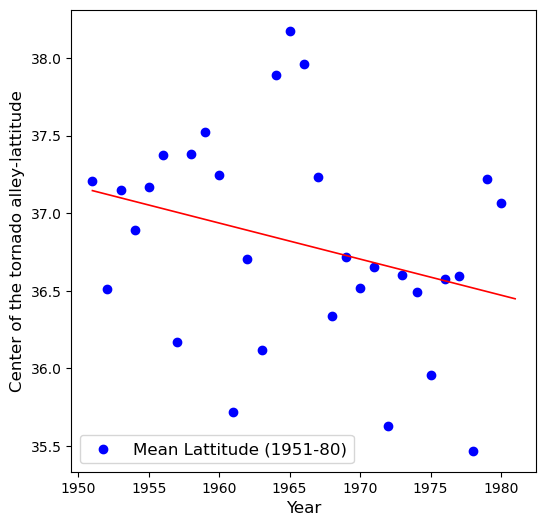

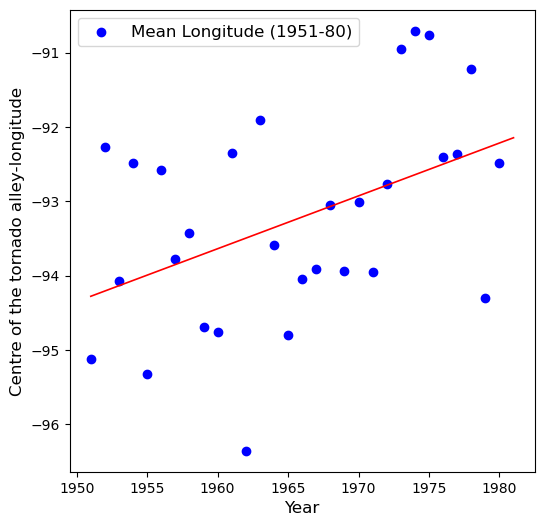

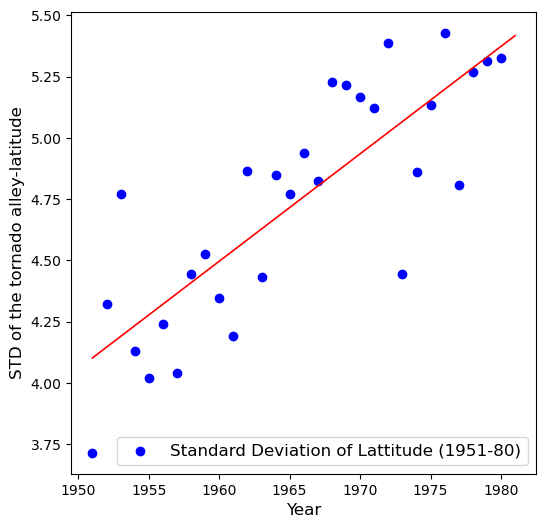

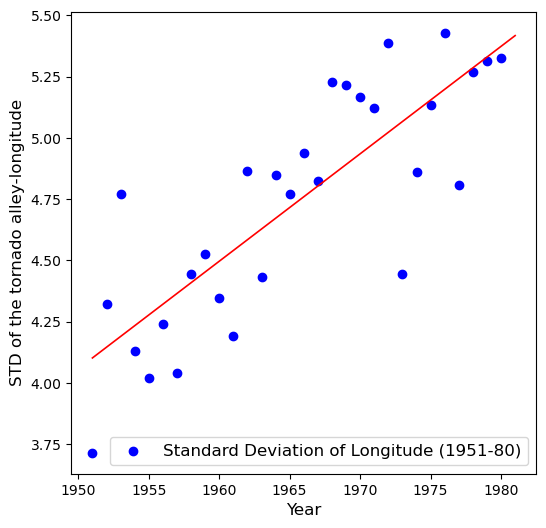

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Mean Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Center of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Mean Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Centre of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Standard Deviation of Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("STD of the tornado alley-latitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Standard Deviation of Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("STD of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

In [6]:
import pandas as pd
import numpy as np

datan = {}

for i in range(1951,1981):
    datanow = data_high[i]
    # Step 1: Compute center
    center_lat = datanow['begin_lat'].mean()
    center_lon = datanow['begin_lon'].mean()

    # Step 2: Compute Euclidean distance from center
    datanow['dist_from_center'] = np.sqrt((datanow['begin_lat'] - center_lat)**2 + (datanow['begin_lon'] - center_lon)**2)

    # Step 3: Remove top 10% furthest points
    threshold = datanow['dist_from_center'].quantile(0.90)
    filtered_data = datanow[datanow['dist_from_center'] <= threshold].copy()

    # Optional: Clean up
    filtered_data.drop(columns='dist_from_center', inplace=True)

    datan[i] = filtered_data
    
    # Create an empty list to store rows
rows = []

for i in range(1951,1981):  # Example loop
    a1 = i
    math_data_df = datan[i][['year','begin_lat','begin_lon']]
    a2 = math_data_df['begin_lat'].mean()
    a3 = math_data_df['begin_lat'].std()
    a4 = math_data_df['begin_lon'].mean()
    a5 = math_data_df['begin_lon'].std()
    
    rows.append([a1, a2, a3, a4 , a5])  # Append the row as a list

# Create DataFrame once after the loop
regress_df = pd.DataFrame(rows, columns=['year', 'begin_lat_mean', 'begin_lat_std', 'begin_lon_mean', 'begin_lon_std'])

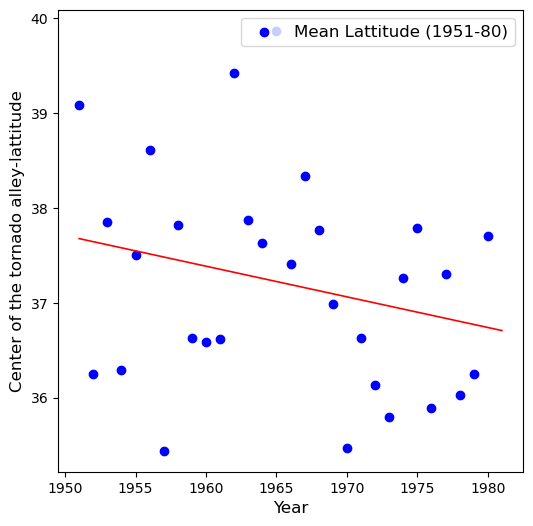

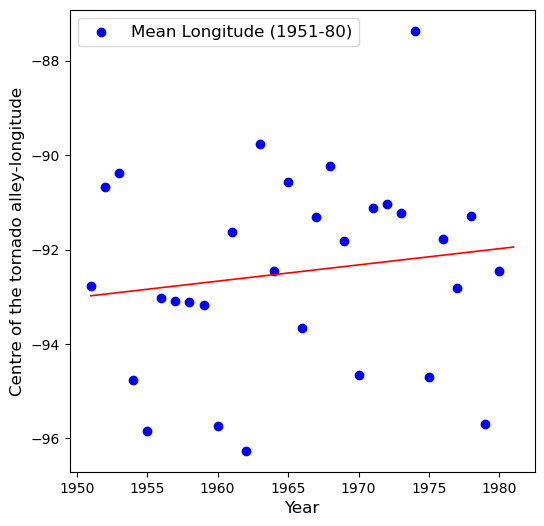

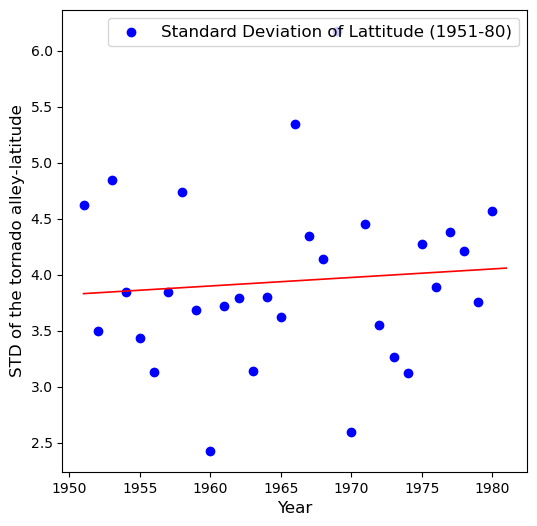

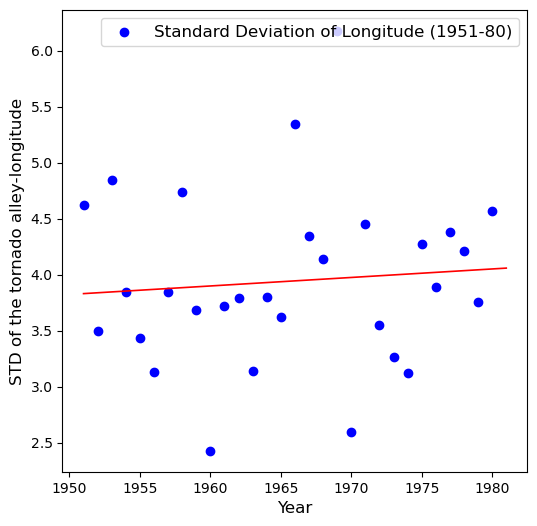

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Mean Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Center of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_mean'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Mean Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Centre of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Standard Deviation of Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("STD of the tornado alley-latitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_std'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Standard Deviation of Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("STD of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation

datan = {}

for i in range(1951,1981):
    datanow = data_low[i]
    # Step 1: Compute center
    center_lat = datanow['begin_lat'].mean()
    center_lon = datanow['begin_lon'].mean()

    # Step 2: Compute Euclidean distance from center
    datanow['dist_from_center'] = np.sqrt((datanow['begin_lat'] - center_lat)**2 + (datanow['begin_lon'] - center_lon)**2)

    # Step 3: Remove top 10% furthest points
    threshold = datanow['dist_from_center'].quantile(0.90)
    filtered_data = datanow[datanow['dist_from_center'] <= threshold].copy()

    # Optional: Clean up
    filtered_data.drop(columns='dist_from_center', inplace=True)

    datan[i] = filtered_data
    
    # Create an empty list to store rows
rows = []

for i in range(1951,1981):  # Example loop
    a1 = i
    math_data_df = datan[i][['year','begin_lat','begin_lon']]
    a2 = math_data_df['begin_lat'].median()
    a3 = median_abs_deviation(math_data_df['begin_lat'], scale='normal')
    a4 = math_data_df['begin_lon'].median()
    a5 = median_abs_deviation(math_data_df['begin_lon'], scale='normal')
    
    rows.append([a1, a2, a3, a4, a5])  # Append the row as a list

# Create DataFrame once after the loop
regress_df = pd.DataFrame(rows, columns=['year', 'begin_lat_median', 'begin_lat_mad', 'begin_lon_median', 'begin_lon_mad'])


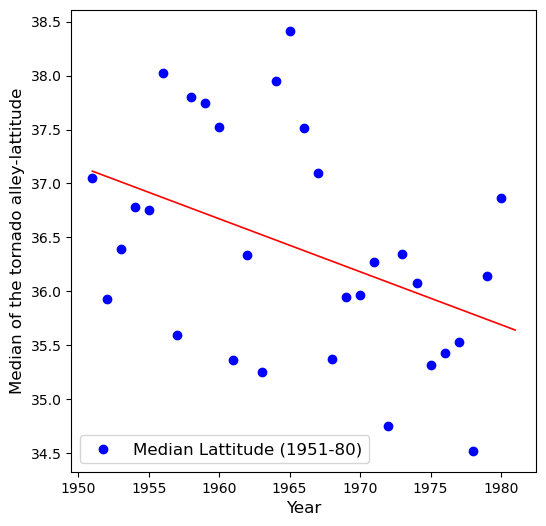

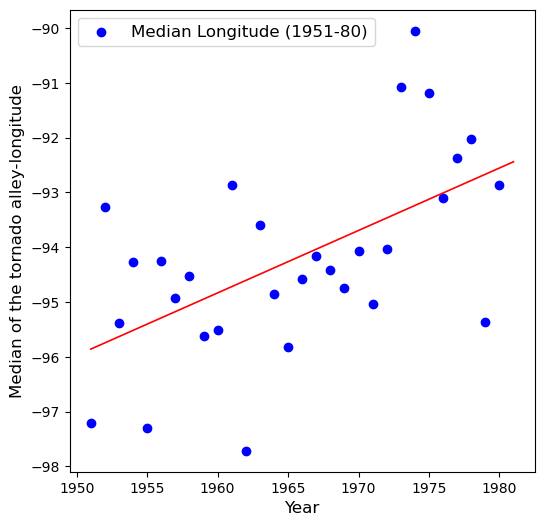

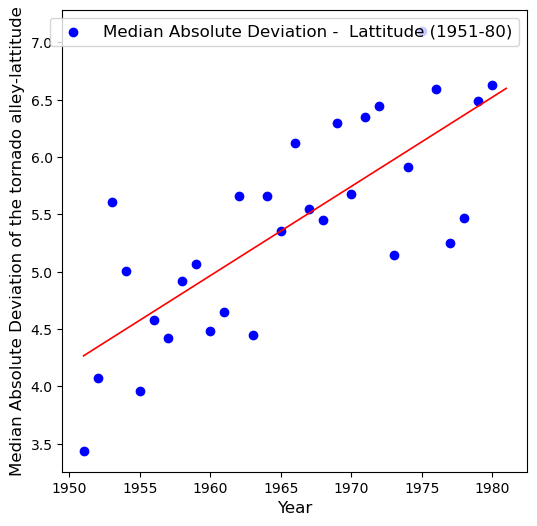

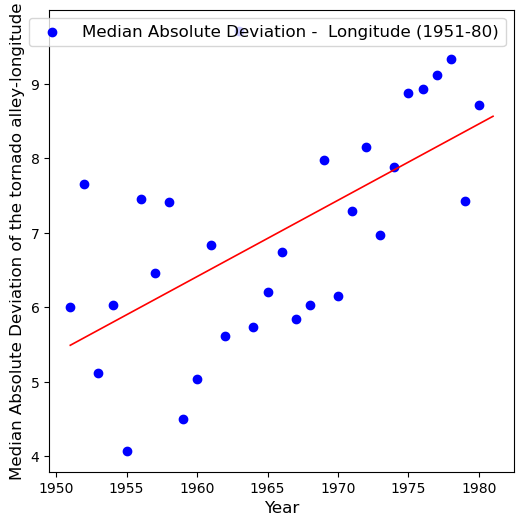

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_median'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_median'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_mad'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Absolute Deviation -  Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Absolute Deviation of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_mad'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Absolute Deviation -  Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Absolute Deviation of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation

datan = {}

for i in range(1951,1981):
    datanow = data_high[i]
    # Step 1: Compute center
    center_lat = datanow['begin_lat'].mean()
    center_lon = datanow['begin_lon'].mean()

    # Step 2: Compute Euclidean distance from center
    datanow['dist_from_center'] = np.sqrt((datanow['begin_lat'] - center_lat)**2 + (datanow['begin_lon'] - center_lon)**2)

    # Step 3: Remove top 10% furthest points
    threshold = datanow['dist_from_center'].quantile(0.90)
    filtered_data = datanow[datanow['dist_from_center'] <= threshold].copy()

    # Optional: Clean up
    filtered_data.drop(columns='dist_from_center', inplace=True)

    datan[i] = filtered_data
    
    # Create an empty list to store rows
rows = []

for i in range(1951,1981):  # Example loop
    a1 = i
    math_data_df = datan[i][['year','begin_lat','begin_lon']]
    a2 = math_data_df['begin_lat'].median()
    a3 = median_abs_deviation(math_data_df['begin_lat'], scale='normal')
    a4 = math_data_df['begin_lon'].median()
    a5 = median_abs_deviation(math_data_df['begin_lon'], scale='normal')
    
    rows.append([a1, a2, a3, a4, a5])  # Append the row as a list

# Create DataFrame once after the loop
regress_df = pd.DataFrame(rows, columns=['year', 'begin_lat_median', 'begin_lat_mad', 'begin_lon_median', 'begin_lon_mad'])


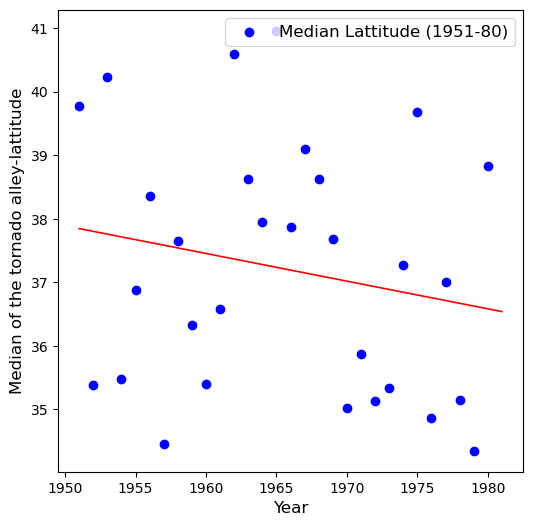

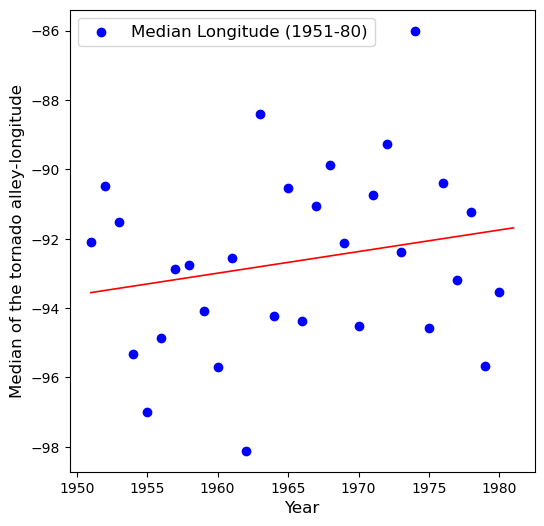

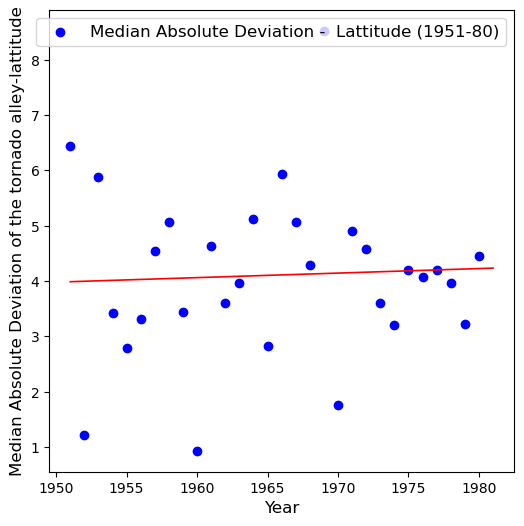

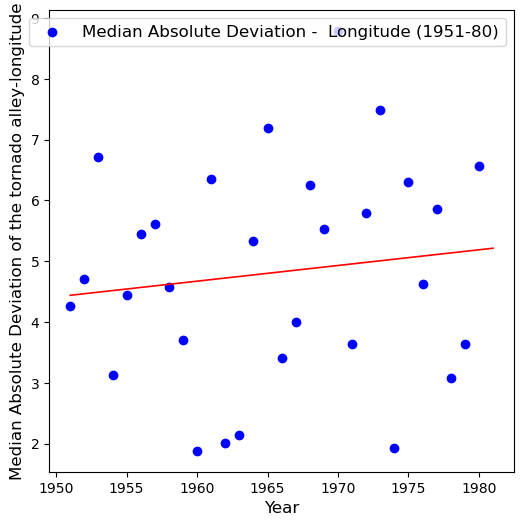

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.linear_model import LinearRegression

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_median'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_median'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lat_mad'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Absolute Deviation -  Lattitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Absolute Deviation of the tornado alley-lattitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()

X_systematic = np.linspace(1951, 1981, 100)
x = np.array(regress_df['year'])
y = np.array(regress_df['begin_lon_mad'])

reg = LinearRegression()

reg.fit(x.reshape(-1, 1), y)

y_pred = reg.predict(X_systematic.reshape(-1, 1))

plt.figure(figsize=(6, 6))

## Plot the observations
plt.scatter(x, y, c="b", label="Median Absolute Deviation -  Longitude (1951-80)")

## Make labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Absolute Deviation of the tornado alley-longitude", fontsize=12)
plt.legend(fontsize=12)
#plt.title("The Observations", fontsize=14)



plt.plot(
    X_systematic, y_pred, "r-", linewidth=1.2, label="Fitted model with minimal MSE"
)

plt.show()